In [121]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from collections import Counter

import re
from matplotlib import pyplot as plt
from gensim.utils import simple_preprocess
from pprint import pprint
import gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.hdpmodel import HdpModel
from gensim.test.utils import common_corpus, common_dictionary
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import pyLDAvis.gensim_models
import pyLDAvis
from gensim.corpora.dictionary import Dictionary

In [122]:
from nltk.tokenize import word_tokenize,sent_tokenize

#preprocessing
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [123]:
stop_words = set(stopwords.words('english'))

# BBC

In [124]:
bbc = pd.read_csv('Data/bbc.csv')

In [125]:
bbc.shape

(15835, 12)

In [126]:
bbc.isna().sum()

news_post_date           6
title                    6
raw_content            363
content                367
url                      9
author               14379
language                 9
_id                      9
region                 346
short_description        9
category                10
crawled_at              10
dtype: int64

In [127]:
14379/15835

0.9080517840227345

In [128]:
360/15835

0.022734449005367856

In [129]:
6/15835

0.0003789074834227976

In [130]:
bbc = bbc.dropna(subset='title')

In [131]:
bbc[82:85]

,news_post_date,title,raw_content,content,url,author,language,_id,region,short_description,category,crawled_at
84,it's obvious really,but growth is our priority and we must remain...,when you cancel thousands of new school build...,it isn't just bad for our kids,it's bad for construction companies at a time...,it's irresponsible.</p></div></div><div data-...,a loan from which government would be paid back,you deprive Britain of the ability to lead th...,it's irresponsible. And we should say so.</p>...,you leave Britain without a plan for growth,which is what this government has done. </p><...,we had the biggest debt we have ever had.</p>...
85,to great leaders who were above all the optim...,but by attitudes and ideals.And there is a de...,let's be humble about our past. Let's underst...,a new generation has taken charge of Labour. ...,https://www.bbc.co.uk/news/uk-politics-11426411,NaN,en_GB,78af6a38-4142-5e18-b90e-0bf3f79fe422,UK Politics,Ed Miliband has delivered his first speech as ...,BBC News,02/05/2021 17:19
86,2010-10-20T17:15:33.000Z,Jersey drug gang given prison term for cocaine...,"<div data-component=""text-block"" class=""ssrcss...",A drugs gang has been jailed by Jersey's Royal...,https://www.bbc.co.uk/news/world-europe-jersey...,NaN,en_GB,b415d133-e441-5c8a-9c77-43dcef16e002,Jersey,A drugs gang is jailed for plotting to import ...,BBC News,02/05/2021 17:19


In [132]:
bbc['news_post_date'] = pd.to_datetime(bbc['news_post_date'], errors='coerce')

In [133]:
bbc.isna().sum()

news_post_date           4
title                    0
raw_content            357
content                361
url                      3
author               14373
language                 3
_id                      3
region                 340
short_description        3
category                 4
crawled_at               4
dtype: int64

In [134]:
bbc[82:85]

,news_post_date,title,raw_content,content,url,author,language,_id,region,short_description,category,crawled_at
84,NaT,but growth is our priority and we must remain...,when you cancel thousands of new school build...,it isn't just bad for our kids,it's bad for construction companies at a time...,it's irresponsible.</p></div></div><div data-...,a loan from which government would be paid back,you deprive Britain of the ability to lead th...,it's irresponsible. And we should say so.</p>...,you leave Britain without a plan for growth,which is what this government has done. </p><...,we had the biggest debt we have ever had.</p>...
85,NaT,but by attitudes and ideals.And there is a de...,let's be humble about our past. Let's underst...,a new generation has taken charge of Labour. ...,https://www.bbc.co.uk/news/uk-politics-11426411,NaN,en_GB,78af6a38-4142-5e18-b90e-0bf3f79fe422,UK Politics,Ed Miliband has delivered his first speech as ...,BBC News,02/05/2021 17:19
86,2010-10-20 17:15:33+00:00,Jersey drug gang given prison term for cocaine...,"<div data-component=""text-block"" class=""ssrcss...",A drugs gang has been jailed by Jersey's Royal...,https://www.bbc.co.uk/news/world-europe-jersey...,NaN,en_GB,b415d133-e441-5c8a-9c77-43dcef16e002,Jersey,A drugs gang is jailed for plotting to import ...,BBC News,02/05/2021 17:19


In [135]:
bbc['year'] = pd.DatetimeIndex(bbc['news_post_date']).year

In [136]:
bbc.year.value_counts()

2010.0    15819
2012.0        6
Name: year, dtype: int64

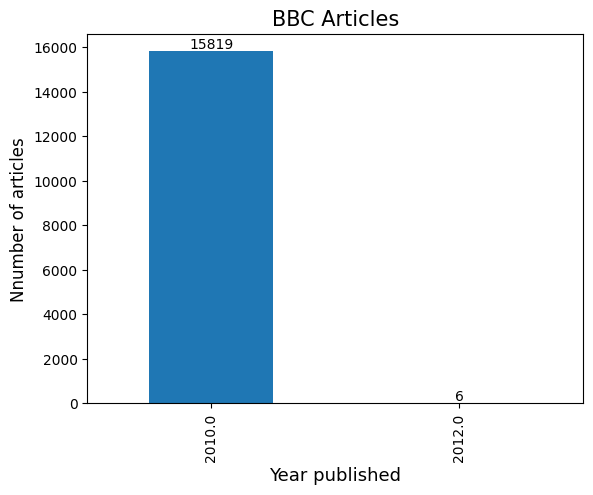

In [137]:
s = bbc['year'].value_counts().sort_index()
ax = s.plot.bar()
ax.bar_label(ax.containers[0])
plt.xlabel('Year published', size=13)
plt.ylabel('Nnumber of articles', size=12)
plt.title('BBC Articles', size=15)
plt.show()

In [138]:
bbc['month'] = pd.DatetimeIndex(bbc['news_post_date']).month

In [139]:
bbc.month.value_counts()

6.0     8125
7.0     5100
5.0     2331
10.0      74
8.0       64
4.0       63
9.0       62
3.0        6
Name: month, dtype: int64

In [140]:
bbc.month.value_counts() / bbc.shape[0]

6.0     0.513298
7.0     0.322193
5.0     0.147261
10.0    0.004675
8.0     0.004043
4.0     0.003980
9.0     0.003917
3.0     0.000379
Name: month, dtype: float64

In [141]:
51.33+32.22+14.73

98.28

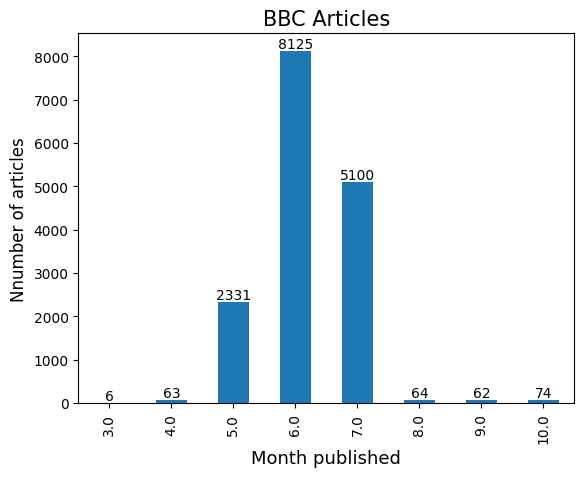

In [142]:
s = bbc['month'].value_counts().sort_index()
ax = s.plot.bar()
ax.bar_label(ax.containers[0])
plt.xlabel('Month published', size=13)
plt.ylabel('Nnumber of articles', size=12)
plt.title('BBC Articles', size=15)
plt.show()

In [143]:
bbc = bbc.dropna(subset='news_post_date')

In [144]:
bbc.to_csv('Data/bbc2.csv')

In [145]:
bbc.shape

(15825, 14)

In [146]:
bbc2012 = bbc[bbc['year']==2012]

In [147]:
bbc2012

,news_post_date,title,raw_content,content,url,author,language,_id,region,short_description,category,crawled_at,year,month
1234,2012-03-06 15:31:39+00:00,Russia's mine accident relatives 'targeted by ...,"<div data-component=""text-block"" class=""ssrcss...",The families of 67 miners killed in a recent a...,https://www.bbc.co.uk/news/10148886,By Richard Galpin,en_GB,f63f4e9f-7f31-58f3-a429-6f64af4c0ce4,Europe,Gangs try to force relatives of Russia's mine ...,BBC News,02/05/2021 17:22,2012.0,3.0
1783,2012-03-06 15:31:34+00:00,"Blast kills six outside theatre in Stavropol, ...","<div data-component=""text-block"" class=""ssrcss...",A bomb has killed at least six people and inju...,https://www.bbc.co.uk/news/10169258,NaN,en_GB,c7ee4f84-bbd2-521d-9589-18b948baf502,Europe,A bomb kills at least six people and injured a...,BBC News,02/05/2021 17:22,2012.0,3.0
5724,2012-03-12 12:52:59+00:00,Slovakia's centre-right opposition 'wins' elec...,"<div data-component=""text-block"" class=""ssrcss...",A coalition of centre-right opposition parties...,https://www.bbc.co.uk/news/10301751,NaN,en_GB,ac9af738-ed0e-51f2-b1d3-34c44e995bd0,Europe,A centre-right coalition wins a majority in Sl...,BBC News,02/05/2021 17:29,2012.0,3.0
5780,2012-03-12 12:53:02+00:00,Slovakia's left-wing PM seeks to form new gove...,"<div data-component=""text-block"" class=""ssrcss...","The Slovak Prime Minister, Robert Fico, has be...",https://www.bbc.co.uk/news/10304535,NaN,en_GB,a5a15ef3-ad30-5be9-b5b9-bccc8563e594,Europe,The centre-right opposition wins Slovak electi...,BBC News,02/05/2021 17:29,2012.0,3.0
8810,2012-03-12 12:53:05+00:00,Slovak centre-right asked to form coalition,"<div data-component=""text-block"" class=""ssrcss...",Slovakia's president has asked a centre-right ...,https://www.bbc.co.uk/news/10395989,NaN,en_GB,cd96367e-350c-58b0-9a7a-14f5d6a94da1,Europe,Slovakia's president asks a centre-right leade...,BBC News,02/05/2021 17:42,2012.0,3.0
13743,2012-03-12 12:53:00+00:00,First Slovak female PM Iveta Radicova takes power,"<div data-component=""text-block"" class=""ssrcss...","Slovakia's first female prime minister, Iveta ...",https://www.bbc.co.uk/news/10567364,NaN,en_GB,776c2b0a-2107-5551-bc4f-ef83d817dcbe,Europe,"Slovakia's first female prime minister, Iveta ...",BBC News,02/05/2021 18:04,2012.0,3.0


In [148]:
bbc2012.title.value_counts()

Russia's mine accident relatives 'targeted by gangs'    1
Blast kills six outside theatre in Stavropol, Russia    1
Slovakia's centre-right opposition 'wins' election      1
Slovakia's left-wing PM seeks to form new government    1
Slovak centre-right asked to form coalition             1
First Slovak female PM Iveta Radicova takes power       1
Name: title, dtype: int64

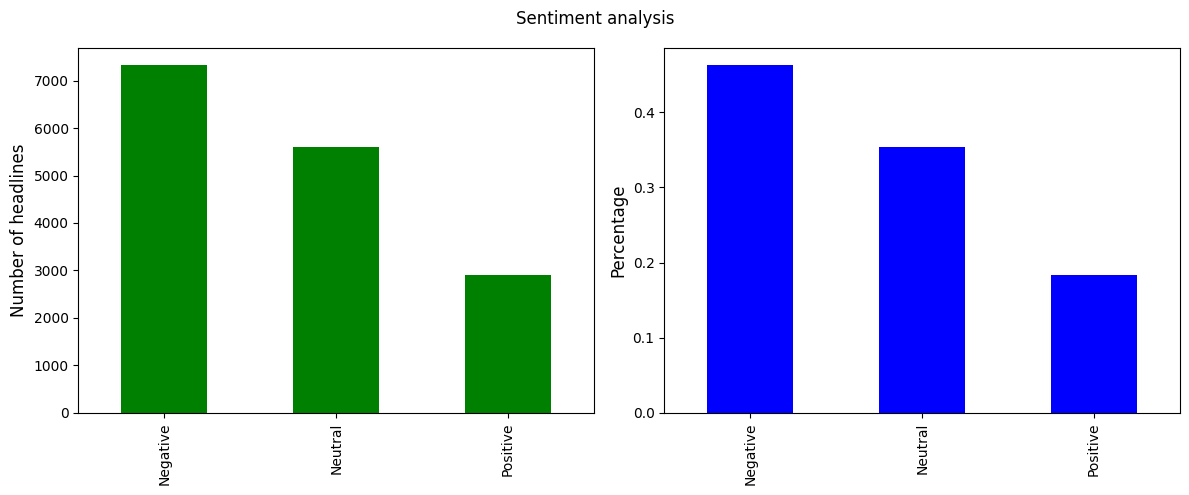

In [149]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
def find_sentiment(title):
    try:
        if sia.polarity_scores(title)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(title)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"
    
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Number of headlines', size=12)
    ax2.set_ylabel(f'Percentage', size=12)
    plt.suptitle(f"Sentiment analysis")
    plt.tight_layout()
    plt.show()
    
bbc['title_sentiment'] = bbc['title'].apply(lambda x: find_sentiment(x))
plot_sentiment(bbc, 'title_sentiment', 'title')

In [150]:
bbc['title_sentiment'].value_counts()/bbc.shape[0]

Negative    0.462622
Neutral     0.354439
Positive    0.182938
Name: title_sentiment, dtype: float64

In [151]:
bbc

,news_post_date,title,raw_content,content,url,author,language,_id,region,short_description,category,crawled_at,year,month,title_sentiment
0,2010-08-06 02:46:40+00:00,Why quitting heroin substitute methadone is 'v...,"<div data-component=""text-block"" class=""ssrcss...",The heroin substitute methadone can be used as...,https://www.bbc.co.uk/news/health-10869329,By Linda Pressly,en_GB,45cbcb62-840b-5a1d-9b59-d7f57f3ab7f6,Health,Heroin substitute methadone is used to wean ad...,BBC News,02/05/2021 17:19,2010.0,8.0,Negative
1,2010-10-12 08:54:42+00:00,North Korea leader's eldest son 'opposes dynasty',"<div data-component=""text-block"" class=""ssrcss...",The eldest son of North Korean leader Kim Jong...,https://www.bbc.co.uk/news/world-asia-pacific-...,NaN,en_GB,771b9c0d-88e1-589f-bf56-8ef80ce161a2,Asia-Pacific,The eldest son of North Korean leader Kim Jong...,BBC News,02/05/2021 17:19,2010.0,10.0,Neutral
2,2010-10-27 17:35:24+00:00,Paintings by gangster Reggie Kray go on sale i...,"<div data-component=""text-block"" class=""ssrcss...",Seven oil paintings created by notorious gangs...,https://www.bbc.co.uk/news/uk-england-lincolns...,NaN,en_GB,768e3fc6-c406-5570-8328-2e6fb75abd1b,Lincolnshire,A series of oil painting produced by gangster ...,BBC News,02/05/2021 17:19,2010.0,10.0,Neutral
3,2010-10-08 13:21:50+00:00,Bracklinn Falls Bridge hauled over gorge by hand,"<div data-component=""text-block"" class=""ssrcss...",A 20-tonne bridge is being hauled into place b...,https://www.bbc.co.uk/news/uk-scotland-tayside...,NaN,en_GB,a6e26396-70ec-501c-8ebc-1d600ddf6aab,Tayside and Central Scotland,A 20-tonne bridge is having to be hauled into ...,BBC News,02/05/2021 17:19,2010.0,10.0,Positive
4,2010-09-22 17:35:34+00:00,Manchester soldier's last words become song,"<div data-component=""text-block"" class=""ssrcss...",The final words written by a guardsman killed ...,https://www.bbc.co.uk/news/uk-england-manchest...,NaN,en_GB,e8a150a5-b6e0-5315-9c04-fc639dee196f,Manchester,The final words written by a guardsman from Ma...,BBC News,02/05/2021 17:19,2010.0,9.0,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15830,2010-07-20 00:45:18+00:00,Police hands over garage death inquiry to HSE,"<div data-component=""text-block"" class=""ssrcss...",An investigation into the death of a young mec...,https://www.bbc.co.uk/news/uk-scotland-north-e...,NaN,en_GB,ac717def-725f-5a4d-a19f-77ac6bb95771,"NE Scotland, Orkney & Shetland",An investigation into the death of a young mec...,BBC News,02/05/2021 18:08,2010.0,7.0,Negative
15831,2010-07-20 00:43:18+00:00,Pringle appeals for help to create archive,"<div data-component=""text-block"" class=""ssrcss...",One of the Borders' best known textile compani...,https://www.bbc.co.uk/news/uk-scotland-south-s...,NaN,en_GB,0f761bbe-3b28-5d40-b40c-fe112260e8f1,South Scotland,Borders-based knitwear firm Pringle of Scotlan...,BBC News,02/05/2021 18:08,2010.0,7.0,Positive
15832,2010-07-19 23:09:28+00:00,Voice technology 'could help detect autism',"<div data-component=""text-block"" class=""ssrcss...",Young children with autism can be identified b...,https://www.bbc.co.uk/news/health-10686912,NaN,en_GB,4631fe89-97cd-5d1d-b69b-6f16896bb242,Health,A new vocal analysis tool could help screen fo...,BBC News,02/05/2021 18:08,2010.0,7.0,Positive
15833,2010-07-19 15:37:11+00:00,New homes target for Bristol and North Somerse...,"<div data-component=""text-block"" class=""ssrcss...",Thousands of homes planned to be built in Bris...,https://www.bbc.co.uk/news/uk-england-bristol-...,NaN,en_GB,f04abfa4-36b1-5a1c-8ee3-8cbc8921e609,Bristol,Thousands of homes planned for Bristol and Nor...,BBC News,02/05/2021 18:08,2010.0,7.0,Negative


In [152]:
bbc = bbc[['news_post_date', 'title', 'content']]

In [153]:
bbc['title_cleaned'] = bbc['title'].map(lambda x: re.sub('[,\.!?\'\:]', '', x))

bbc['title_cleaned'] = bbc['title_cleaned'].map(lambda x: x.lower())

<>:1: DeprecationWarning: invalid escape sequence \.
<>:1: DeprecationWarning: invalid escape sequence \.
C:\Users\odono\AppData\Local\Temp\ipykernel_11332\3927090377.py:1: DeprecationWarning: invalid escape sequence \.
  bbc['title_cleaned'] = bbc['title'].map(lambda x: re.sub('[,\.!?\'\:]', '', x))
C:\Users\odono\AppData\Local\Temp\ipykernel_11332\3927090377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbc['title_cleaned'] = bbc['title'].map(lambda x: re.sub('[,\.!?\'\:]', '', x))
C:\Users\odono\AppData\Local\Temp\ipykernel_11332\3927090377.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [154]:
bbc

,news_post_date,title,content,title_cleaned
0,2010-08-06 02:46:40+00:00,Why quitting heroin substitute methadone is 'v...,The heroin substitute methadone can be used as...,why quitting heroin substitute methadone is vital
1,2010-10-12 08:54:42+00:00,North Korea leader's eldest son 'opposes dynasty',The eldest son of North Korean leader Kim Jong...,north korea leaders eldest son opposes dynasty
2,2010-10-27 17:35:24+00:00,Paintings by gangster Reggie Kray go on sale i...,Seven oil paintings created by notorious gangs...,paintings by gangster reggie kray go on sale i...
3,2010-10-08 13:21:50+00:00,Bracklinn Falls Bridge hauled over gorge by hand,A 20-tonne bridge is being hauled into place b...,bracklinn falls bridge hauled over gorge by hand
4,2010-09-22 17:35:34+00:00,Manchester soldier's last words become song,The final words written by a guardsman killed ...,manchester soldiers last words become song
...,...,...,...,...
15830,2010-07-20 00:45:18+00:00,Police hands over garage death inquiry to HSE,An investigation into the death of a young mec...,police hands over garage death inquiry to hse
15831,2010-07-20 00:43:18+00:00,Pringle appeals for help to create archive,One of the Borders' best known textile compani...,pringle appeals for help to create archive
15832,2010-07-19 23:09:28+00:00,Voice technology 'could help detect autism',Young children with autism can be identified b...,voice technology could help detect autism
15833,2010-07-19 15:37:11+00:00,New homes target for Bristol and North Somerse...,Thousands of homes planned to be built in Bris...,new homes target for bristol and north somerse...


C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wo

C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

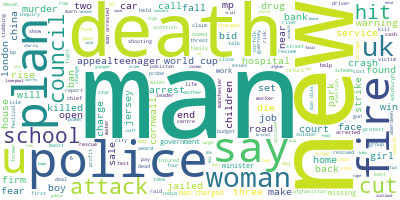

In [155]:
from wordcloud import WordCloud


combine_titles = ','.join(list(bbc['title_cleaned'].values))

wordcloud = WordCloud(background_color="white")
wordcloud.generate(combine_titles)
wordcloud.to_image()

In [156]:
titles = bbc.title_cleaned.values.tolist()

In [157]:
titles_words = []
for x in titles:
    titles_words.append(x.split())

In [158]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
titles_words = remove_stopwords(titles_words)

In [159]:
bbc_titles2 = bbc.title_cleaned.values.tolist()

C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\an

C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\an

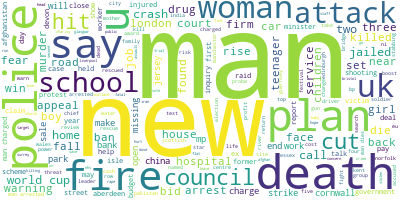

In [160]:
from wordcloud import WordCloud


combine_titles = ','.join(bbc_titles2)

wordcloud = WordCloud(background_color="white")
wordcloud.generate(combine_titles)
wordcloud.to_image()

In [181]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(titles_words)

# Create Corpus
texts = titles_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [162]:
# number of topics
num_topics = 4

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.007*"man" + 0.007*"police" + 0.006*"woman" + 0.006*"fire" + 0.005*"death" '
  '+ 0.005*"car" + 0.005*"crash" + 0.004*"dies" + 0.003*"charged" + '
  '0.003*"oil"'),
 (1,
  '0.007*"police" + 0.005*"attack" + 0.004*"crash" + 0.004*"murder" + '
  '0.004*"plan" + 0.004*"new" + 0.004*"killed" + 0.004*"death" + 0.003*"man" + '
  '0.003*"council"'),
 (2,
  '0.020*"man" + 0.005*"school" + 0.005*"attack" + 0.005*"world" + 0.004*"cup" '
  '+ 0.004*"new" + 0.004*"us" + 0.004*"jailed" + 0.004*"oil" + 0.004*"crash"'),
 (3,
  '0.009*"man" + 0.007*"new" + 0.007*"police" + 0.005*"uk" + 0.005*"two" + '
  '0.004*"us" + 0.004*"fire" + 0.004*"murder" + 0.004*"three" + 0.003*"near"')]


In [163]:
#lsi_model = gensim.models.LsiModel(corpus_tfidf, id2word=id2word, num_topics=6)

pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

LDAvis_prepared

C:\Users\odono\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.050527 -0.021348       1        1  26.944609
0     -0.048313 -0.005928       2        1  25.950663
3      0.069219 -0.054879       3        1  25.064786
1      0.029622  0.082156       4        1  22.039942, topic_info=        Term        Freq       Total Category  logprob  loglift
166      man  953.000000  953.000000  Default  30.0000  30.0000
38    school  197.000000  197.000000  Default  29.0000  29.0000
1047  attack  271.000000  271.000000  Default  28.0000  28.0000
1003     cup  156.000000  156.000000  Default  27.0000  27.0000
367    woman  295.000000  295.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
133      two   43.222085  238.711861   Topic4  -6.1583  -0.1966
1178    home   37.448981  166.858067   Topic4  -6.3017   0.0181
367    woman   40.618994  295.947491   Topic4  -6.2204  -0.4736
1004   world   38.224201  206.708638   Topic4  -6.2812  -0.1755
86    jailed   35.659287  198.920406   Topic4  -6.3507  -0.2066

[382 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
489        1  0.506873  aberdeen
489        2  0.164734  aberdeen
489        3  0.114046  aberdeen
489        4  0.202749  aberdeen
2173       1  0.337527     abuse
...      ...       ...       ...
255        2  0.538423      year
255        3  0.089737      year
255        4  0.157040      year
13397      4  0.811210      ymca
14044      1  0.960909       zsa

[771 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

# LDA

1: 0.35666934147014323
2: 0.36566010256288384
3: 0.3485177267712622
4: 0.34016472720916446
5: 0.34961132388754745
6: 0.37892529292321275
7: 0.3640126973961237
8: 0.3447074821631301
9: 0.36148837388128346
10: 0.34625274334288936
11: 0.3702905865485777
12: 0.3774953241201395
13: 0.3756485998553203
14: 0.3650046961417817
15: 0.3873173831793349
16: 0.3873464783549097
17: 0.38848179415009393


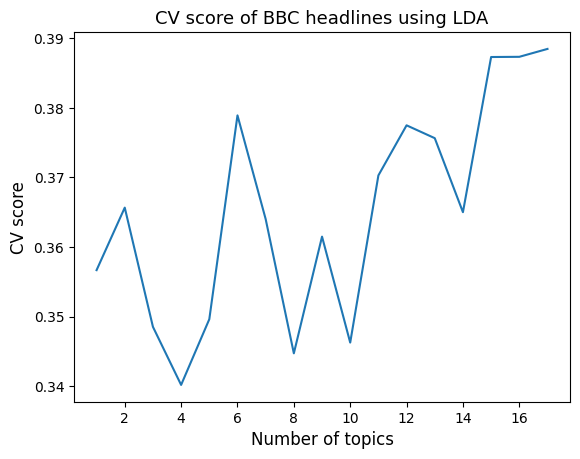

In [164]:
results = []

for i in range(1,18):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=i, iterations=50)

    cm = CoherenceModel(model=lda_model, texts=titles_words, dictionary=id2word, coherence='c_v')
    coherence = cm.get_coherence()  # get coherence value

    print(f"{i}: {coherence}")
    tup = i, coherence
    results.append(tup)

results = pd.DataFrame(results, columns=['topic', 'coherence'])
s = pd.Series(results.coherence.values, index=results.topic.values)
_ = s.plot()
plt.xlabel('Number of topics', size=12)
plt.ylabel('CV score', size=12)
plt.title('CV score of BBC headlines using LDA', size=13)
plt.show()

1: -8.280626228360717
2: -8.484039773145348
3: -8.940140802100501
4: -8.925574796798111
5: -8.52738174110628
6: -8.747853797907773
7: -8.951174632752132
8: -9.224122184385058
9: -9.676659627778394
10: -8.971618851005882
11: -9.253649762957012
12: -9.723484223858726
13: -9.423842611965952
14: -9.181723532858731


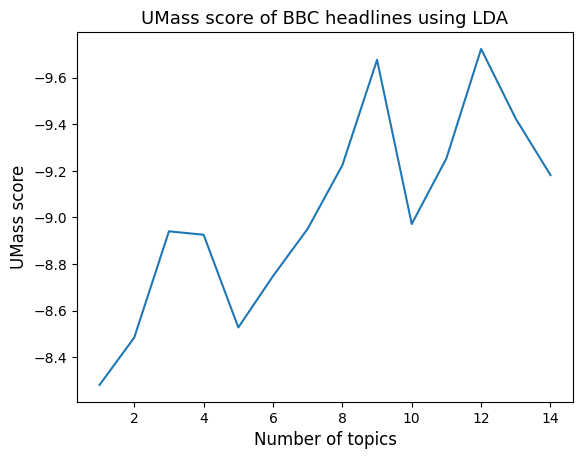

In [166]:
results = []

for i in range(1,15):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=i, iterations=50, alpha=.01)

    cm = CoherenceModel(model=lda_model, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()  # get coherence value

    print(f"{i}: {coherence}")
    
    tup = i, coherence
    results.append(tup)

results = pd.DataFrame(results, columns=['topic', 'coherence'])
s = pd.Series(results.coherence.values, index=results.topic.values)
_ = s.plot().invert_yaxis()
plt.xlabel('Number of topics', size=12)
plt.ylabel('UMass score', size=12)
plt.title('UMass score of BBC headlines using LDA', size=13)
plt.show()

# LSI

2: -12.138281420473735
3: -12.883272082527725
4: -9.43814832340126
5: -9.774220242903482
6: -12.340309276464518
7: -10.967789054597576
8: -10.308908343170422
9: -10.069862722242267
10: -12.212583053471148
11: -10.12287001966083
12: -11.049308903363496
13: -11.436518311220299
14: -10.877246976382938


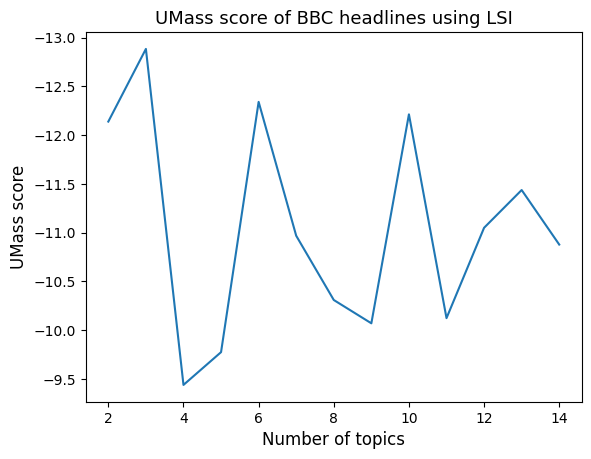

In [167]:
results = []

for i in range(2,15):
    lsi_model = gensim.models.LsiModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=i)

    cm = CoherenceModel(model=lsi_model, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()  # get coherence value

    print(f"{i}: {coherence}")
    
    tup = i, coherence
    results.append(tup)

results = pd.DataFrame(results, columns=['topic', 'coherence'])
s = pd.Series(results.coherence.values, index=results.topic.values)
_ = s.plot().invert_yaxis()
plt.xlabel('Number of topics', size=12)
plt.ylabel('UMass score', size=12)
plt.title('UMass score of BBC headlines using LSI', size=13)
plt.show()

In [168]:
tfidf = gensim.models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

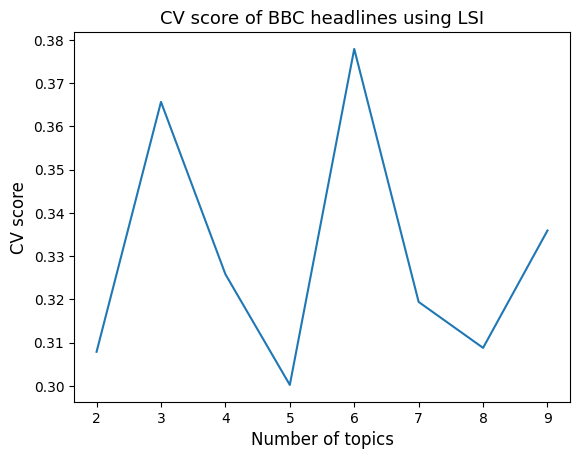

In [191]:
results = [] 

for t in range(2, 10):
    lsi_model = gensim.models.LsiModel(corpus_tfidf, id2word=id2word, num_topics=t)
    corpus_lsi = lsi_model[corpus_tfidf]

    cm = CoherenceModel(model=lsi_model, texts=titles_words, coherence='c_v')
    score = cm.get_coherence()
    tup = t, score
    results.append(tup)

results = pd.DataFrame(results, columns=['topic', 'score'])

s = pd.Series(results.score.values, index=results.topic.values)
_ = s.plot()
plt.xlabel('Number of topics', size=12)
plt.ylabel('CV score', size=12)
plt.title('CV score of BBC headlines using LSI', size=13)
plt.show()

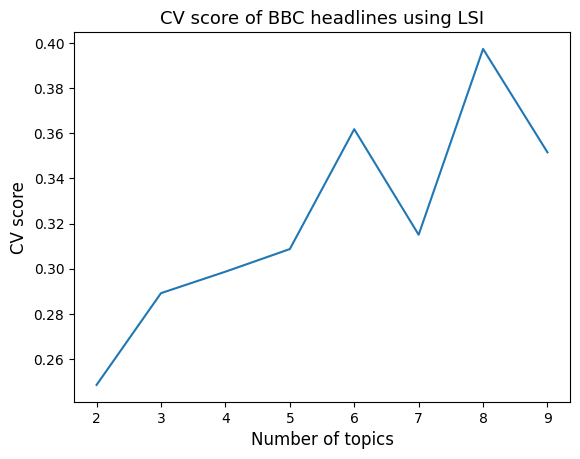

In [170]:
results = [] 

for t in range(2, 10):
    lsi_model = gensim.models.LsiModel(corpus_tfidf, id2word=id2word, num_topics=t)
    corpus_lsi = lsi_model[corpus_tfidf]

    cm = CoherenceModel(model=lsi_model, texts=titles_words, coherence='c_v')
    score = cm.get_coherence()
    tup = t, score
    results.append(tup)

results = pd.DataFrame(results, columns=['topic', 'score'])

s = pd.Series(results.score.values, index=results.topic.values)
_ = s.plot()
plt.xlabel('Number of topics', size=12)
plt.ylabel('CV score', size=12)
plt.title('CV score of BBC headlines using LSI', size=13)
plt.show()

In [171]:
# Build LSI model
lsi2 = gensim.models.LsiModel(corpus_tfidf, id2word=id2word, num_topics=6)

# Print the Keyword in the 10 topics
pprint(lsi2.print_topics())
doc_lda = lsi2[corpus]

[(0,
  '0.602*"man" + 0.228*"crash" + 0.210*"charged" + 0.200*"murder" + '
  '0.193*"arrested" + 0.172*"dies" + 0.162*"death" + 0.155*"police" + '
  '0.148*"woman" + 0.139*"attack"'),
 (1,
  '0.574*"crash" + 0.365*"killed" + -0.313*"man" + 0.222*"dies" + '
  '-0.200*"murder" + 0.176*"car" + 0.173*"named" + -0.172*"charged" + '
  '0.161*"road" + 0.159*"motorcyclist"'),
 (2,
  '0.386*"world" + 0.366*"cup" + 0.362*"police" + -0.237*"man" + 0.203*"new" + '
  '-0.180*"crash" + 0.143*"council" + 0.138*"cuts" + 0.137*"fire" + '
  '-0.120*"dies"'),
 (3,
  '-0.467*"world" + -0.447*"cup" + 0.423*"fire" + -0.283*"man" + 0.184*"two" + '
  '0.167*"house" + 0.155*"woman" + 0.132*"men" + 0.107*"new" + 0.098*"death"'),
 (4,
  '-0.557*"fire" + 0.338*"police" + -0.270*"world" + -0.258*"cup" + '
  '-0.230*"house" + -0.187*"dies" + -0.178*"woman" + 0.148*"killed" + '
  '-0.125*"two" + 0.123*"uk"'),
 (5,
  '-0.305*"man" + 0.297*"murder" + 0.276*"police" + 0.258*"two" + '
  '0.253*"death" + -0.230*"dies" + 

In [172]:
# Build LSI model
#lda2 = gensim.models.LsiModel(corpus_tfidf, id2word=id2word, num_topics=6)
lda2 = gensim.models.LdaMulticore(corpus=corpus_tfidf,
                                           id2word=id2word,
                                           num_topics=6, iterations=50)
# Print the Keyword in the 10 topics
pprint(lda2.print_topics())
doc_lda = lda2[corpus]

[(0,
  '0.005*"man" + 0.003*"police" + 0.002*"court" + 0.002*"death" + '
  '0.002*"killed" + 0.002*"charged" + 0.002*"two" + 0.002*"us" + 0.002*"car" + '
  '0.002*"arrested"'),
 (1,
  '0.003*"man" + 0.003*"new" + 0.003*"police" + 0.002*"us" + 0.002*"uk" + '
  '0.002*"woman" + 0.002*"attack" + 0.002*"killed" + 0.002*"city" + '
  '0.002*"death"'),
 (2,
  '0.004*"man" + 0.003*"oil" + 0.002*"new" + 0.002*"bp" + 0.002*"uk" + '
  '0.002*"fire" + 0.002*"dies" + 0.002*"police" + 0.002*"attack" + '
  '0.002*"death"'),
 (3,
  '0.005*"man" + 0.003*"fire" + 0.003*"death" + 0.003*"car" + 0.003*"crash" + '
  '0.003*"police" + 0.003*"inquiry" + 0.003*"new" + 0.003*"arrested" + '
  '0.003*"woman"'),
 (4,
  '0.004*"man" + 0.003*"police" + 0.003*"crash" + 0.002*"council" + '
  '0.002*"killed" + 0.002*"murder" + 0.002*"three" + 0.002*"india" + '
  '0.002*"hit" + 0.002*"new"'),
 (5,
  '0.004*"man" + 0.004*"woman" + 0.003*"fire" + 0.003*"charged" + '
  '0.002*"police" + 0.002*"home" + 0.002*"crash" + 0.002

In [173]:
# Build LSI model
#lda2 = gensim.models.LsiModel(corpus_tfidf, id2word=id2word, num_topics=6)
lda2 = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, iterations=50)
# Print the Keyword in the 10 topics
pprint(lda2.print_topics())
doc_lda = lda2[corpus]

[(0,
  '0.008*"man" + 0.007*"woman" + 0.006*"oil" + 0.005*"bp" + 0.005*"school" + '
  '0.005*"dies" + 0.004*"uk" + 0.004*"warning" + 0.004*"arrested" + '
  '0.003*"fire"'),
 (1,
  '0.009*"man" + 0.009*"fire" + 0.007*"crash" + 0.005*"two" + 0.005*"police" + '
  '0.005*"new" + 0.005*"attack" + 0.004*"dies" + 0.004*"uk" + 0.004*"council"'),
 (2,
  '0.012*"man" + 0.006*"us" + 0.006*"murder" + 0.005*"new" + 0.005*"world" + '
  '0.005*"death" + 0.005*"cup" + 0.004*"charged" + 0.004*"police" + '
  '0.003*"injured"'),
 (3,
  '0.013*"police" + 0.012*"man" + 0.006*"new" + 0.005*"death" + 0.004*"court" '
  '+ 0.004*"found" + 0.004*"appeal" + 0.004*"jailed" + 0.004*"home" + '
  '0.004*"us"')]


In [174]:
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda2, corpus, id2word)

LDAvis_prepared

C:\Users\odono\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.001535  0.086441       1        1  26.738707
3     -0.061366 -0.012468       2        1  25.042918
2     -0.025172 -0.051946       3        1  24.885877
0      0.088073 -0.022027       4        1  23.332498, topic_info=        Term        Freq       Total Category  logprob  loglift
214   police  558.000000  558.000000  Default  30.0000  30.0000
1816      bp  139.000000  139.000000  Default  29.0000  29.0000
510      oil  211.000000  211.000000  Default  28.0000  28.0000
1003     cup  154.000000  154.000000  Default  27.0000  27.0000
1004   world  204.000000  204.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
409    crash   48.468232  351.352260   Topic4  -6.1008  -0.5256
1047  attack   44.908040  271.626935   Topic4  -6.1770  -0.3445
214   police   49.035452  558.065746   Topic4  -6.0891  -0.9766
108      new   45.546549  427.646616   Topic4  -6.1629  -0.7842
111    death   43.509019  333.335222   Topic4  -6.2087  -0.5809

[371 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
489        1  0.400970  aberdeen
489        2  0.538804  aberdeen
489        3  0.012530  aberdeen
489        4  0.050121  aberdeen
13787      4  0.829843  acoustic
...      ...       ...       ...
255        1  0.091394      year
255        2  0.102818      year
255        3  0.594061      year
255        4  0.217061      year
14044      2  0.955247       zsa

[781 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])

# HDP

In [178]:
hdp = HdpModel(corpus=corpus_tfidf, id2word=id2word)
pprint(hdp.print_topics())

In [179]:
pprint(hdp.print_topics())

[(0,
  '0.001*opening + 0.001*hillsborough + 0.001*seriously + 0.001*coward + '
  '0.001*river + 0.001*firebomb + 0.001*truck + 0.001*rates + 0.001*mail + '
  '0.001*clwyd'),
 (1,
  '0.001*pub + 0.001*lieberman + 0.001*sack + 0.001*updated + 0.001*plunges + '
  '0.001*morocco + 0.001*harbours + 0.001*knitwear + 0.001*phone + '
  '0.001*danny'),
 (2,
  '0.001*shipwreck + 0.001*dhaka + 0.001*losing + 0.001*embrace + 0.001*derrys '
  '+ 0.001*cheney + 0.001*sydenham + 0.001*facebook + 0.001*swimmer + '
  '0.001*boring'),
 (3,
  '0.001*preparatory + 0.001*wait + 0.001*jump + 0.001*rob + 0.001*manpower + '
  '0.001*cameroonian + 0.001*anxious + 0.001*zombies + 0.000*harris + '
  '0.000*tar'),
 (4,
  '0.001*dumbarton + 0.001*teesside + 0.001*lucha + 0.001*walters + '
  '0.001*rocking + 0.001*lennon + 0.001*advise + 0.001*choices + '
  '0.000*bungalow + 0.000*dartford'),
 (5,
  '0.001*childish + 0.001*stillborn + 0.001*indicates + 0.001*honey + '
  '0.001*conman + 0.001*third + 0.001*traps + 

In [195]:
hdptopics = hdp.show_topics(formatted=False)
hdptopics[0]

(0,
 [('barn', 0.00063765867283899),
  ('us', 0.000512785144159572),
  ('ms', 0.0005113480604044825),
  ('tyres', 0.0005088212493000618),
  ('roosevelt', 0.00048594430740891574),
  ('nigerias', 0.0004857346677406681),
  ('man', 0.00047409140296448535),
  ('majorca', 0.0004692700547914639),
  ('schoolboy', 0.0004675167703721226),
  ('safe', 0.00046633146202611377),
  ('fire', 0.0004592915584665628),
  ('robust', 0.00044941701610269467),
  ('repaint', 0.0004370783743807326),
  ('littlehampton', 0.0004346393714208823),
  ('shell', 0.00043074227576911085),
  ('angry', 0.00043042960685401216),
  ('margate', 0.0004283203932342332),
  ('unprepared', 0.0004254901248073838),
  ('colman', 0.0004251606856171214),
  ('magee', 0.0004239249391635379)])

In [200]:
hdptopics[5]

(5,
 [('police', 0.0011356048584199173),
  ('man', 0.0006528784117695039),
  ('detective', 0.0006152569906176629),
  ('cheating', 0.0006110787203047433),
  ('toxins', 0.0005426684014034792),
  ('electrocuted', 0.0005399222890167106),
  ('philippe', 0.000535104802697924),
  ('language', 0.00052456854480464),
  ('popes', 0.0005215316936750619),
  ('school', 0.0005214535136670508),
  ('department', 0.0005094275043083115),
  ('hollesley', 0.0004882253162404723),
  ('defaults', 0.00048602050497429424),
  ('troops', 0.00048351990267295707),
  ('ams', 0.00047686185494485653),
  ('nicole', 0.0004757825174259917),
  ('symphony', 0.00046781822575036924),
  ('anthrax', 0.00046667747343996955),
  ('bidder', 0.0004655381893237237),
  ('found', 0.0004644988241268454)])

In [193]:
hdp_cm=CoherenceModel(model=hdp,corpus=corpus,dictionary=id2word, texts=titles_words,coherence='c_v')
HDP_cm=hdp_cm.get_coherence()
HDP_cm

C:\Users\odono\anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
C:\Users\odono\anaconda3\lib\site-packages\gensim\topic_coherence\indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


nan

# Crypto

In [59]:
crypto = pd.read_csv('Data/crypto_news_dataset.csv')

In [60]:
crypto.isna().sum()

title           0
url             0
published_at    0
author          0
header_image    0
raw_content     0
tags            6
publisher       0
scraped_at      0
dtype: int64

In [61]:
crypto.duplicated().sum()

0

In [62]:
crypto = crypto[['title', 'published_at', 'publisher']]

In [63]:
crypto.publisher.nunique()

1

In [64]:
crypto = crypto[['title', 'published_at']]

In [65]:
crypto.isna().sum()

title           0
published_at    0
dtype: int64

In [66]:
crypto.dtypes

title           object
published_at    object
dtype: object

In [67]:
crypto['published_at'] = pd.to_datetime(crypto['published_at'], utc=True)

In [68]:
crypto.dtypes

title                        object
published_at    datetime64[ns, UTC]
dtype: object

In [69]:
crypto['title_cleaned'] = crypto['title'].map(lambda x: re.sub('[,\.!?\'\:]', '', x))

crypto['title_cleaned'] = crypto['title_cleaned'].map(lambda x: x.lower())

<>:1: DeprecationWarning: invalid escape sequence \.
<>:1: DeprecationWarning: invalid escape sequence \.
C:\Users\odono\AppData\Local\Temp\ipykernel_11332\1695853257.py:1: DeprecationWarning: invalid escape sequence \.
  crypto['title_cleaned'] = crypto['title'].map(lambda x: re.sub('[,\.!?\'\:]', '', x))


In [70]:
crypto['year'] = pd.DatetimeIndex(crypto['published_at']).year

In [71]:
crypto.year.value_counts()

2018    435
2017    420
2016     96
2019     58
2015     47
2014     22
2013      1
Name: year, dtype: int64

In [72]:
crypto.year.value_counts() / crypto.shape[0]

2018    0.403151
2017    0.389249
2016    0.088971
2019    0.053753
2015    0.043559
2014    0.020389
2013    0.000927
Name: year, dtype: float64

<AxesSubplot: >

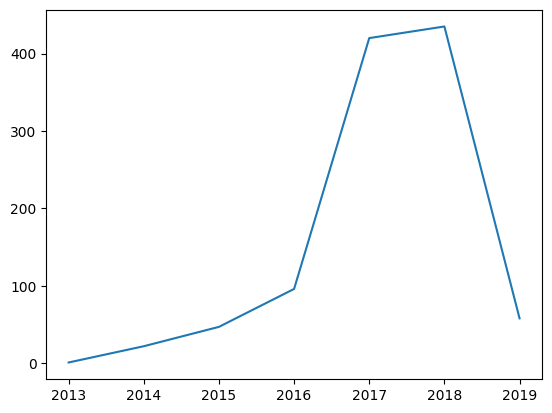

In [73]:
s = crypto['year'].value_counts().sort_index()
s.plot()

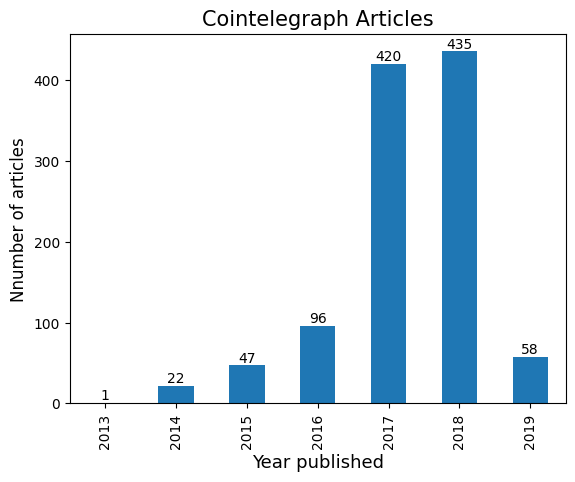

In [74]:
s = crypto['year'].value_counts().sort_index()
ax = s.plot.bar()
ax.bar_label(ax.containers[0])
plt.xlabel('Year published', size=13)
plt.ylabel('Nnumber of articles', size=12)
plt.title('Cointelegraph Articles', size=15)
plt.show()

<AxesSubplot: >

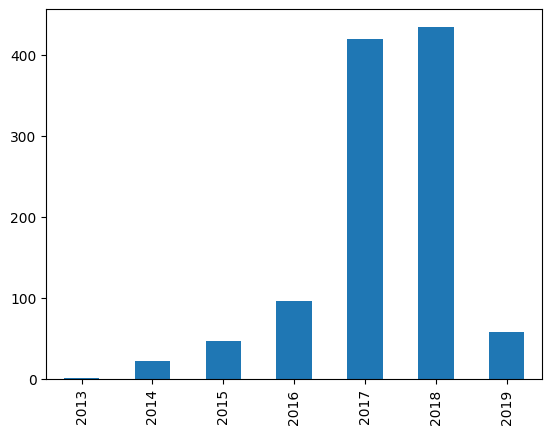

In [75]:
s = crypto['year'].value_counts().sort_index()
s.plot.bar()

In [76]:
crypto['month'] = pd.DatetimeIndex(crypto['published_at']).month

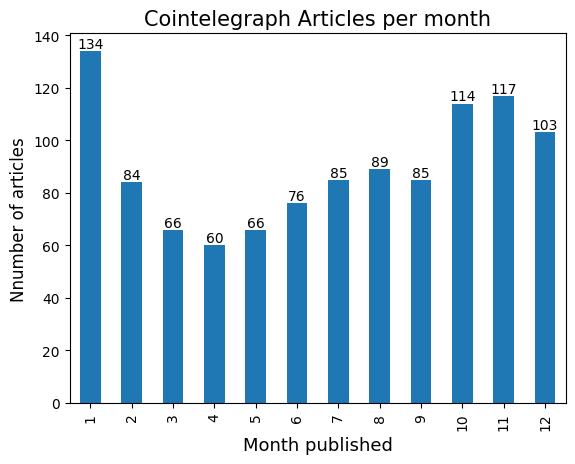

In [77]:
s = crypto['month'].value_counts().sort_index()
ax = s.plot.bar()
ax.bar_label(ax.containers[0])
plt.xlabel('Month published', size=13)
plt.ylabel('Nnumber of articles', size=12)
plt.title('Cointelegraph Articles per month', size=15)
plt.show()

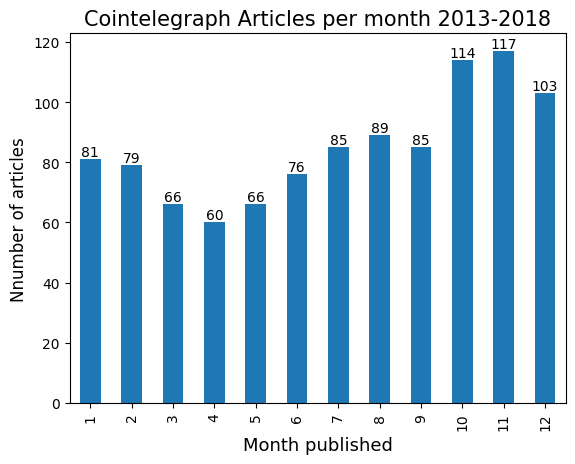

In [78]:
s = crypto[crypto['year']<2019]['month'].value_counts().sort_index()
ax = s.plot.bar()
ax.bar_label(ax.containers[0])
plt.xlabel('Month published', size=13)
plt.ylabel('Nnumber of articles', size=12)
plt.title('Cointelegraph Articles per month 2013-2018', size=15)
plt.show()

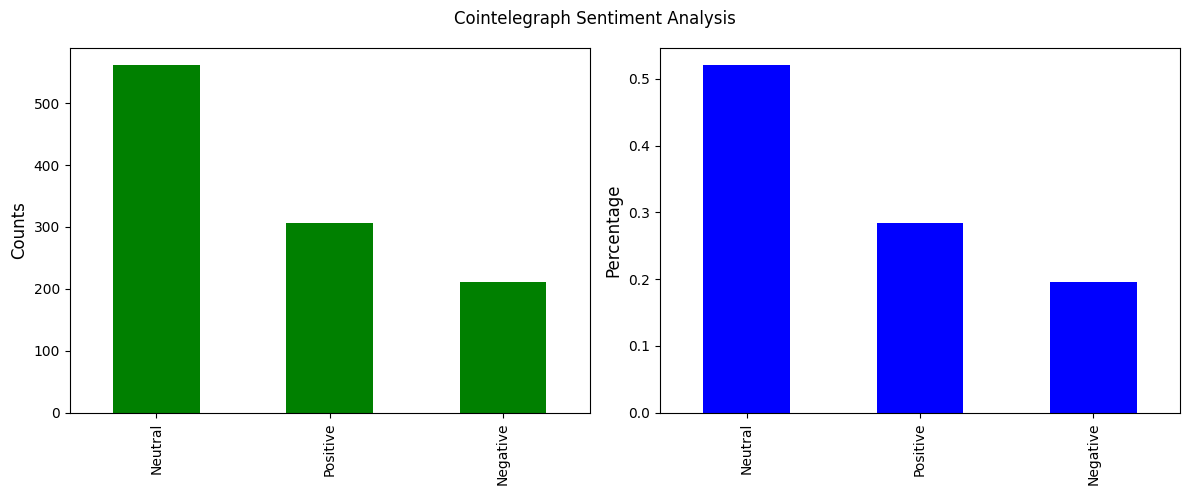

In [79]:
def find_sentiment(title):
    try:
        if sia.polarity_scores(title)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(title)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"
    
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts', size=12)
    ax2.set_ylabel(f'Percentage', size=12)
    plt.suptitle(f"Cointelegraph Sentiment Analysis")
    plt.tight_layout()
    plt.show()
    
crypto['title_sentiment'] = crypto['title'].apply(lambda x: find_sentiment(x))
plot_sentiment(crypto, 'title_sentiment', 'title')

In [80]:
crypto.title_sentiment.value_counts() / crypto.shape[0]

Neutral     0.519926
Positive    0.284523
Negative    0.195551
Name: title_sentiment, dtype: float64

In [81]:
crypto_titles = crypto.title_cleaned.values.tolist()

crypto_titles_words = []
for x in crypto_titles:
    crypto_titles_words.append(x.split())
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
crypto_titles_words = remove_stopwords(crypto_titles_words)

import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(crypto_titles_words)

# Create Corpus
texts = crypto_titles_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

from pprint import pprint

# number of topics
num_topics = 5

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

import pyLDAvis.gensim_models
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

LDAvis_prepared

[(0,
  '0.028*"blockchain" + 0.017*"crypto" + 0.012*"bitcoin" + 0.009*"bank" + '
  '0.006*"platform" + 0.006*"new" + 0.005*"launch" + 0.005*"says" + '
  '0.004*"exchange" + 0.004*"launches"'),
 (1,
  '0.049*"bitcoin" + 0.011*"crypto" + 0.010*"blockchain" + 0.009*"price" + '
  '0.008*"cash" + 0.008*"litecoin" + 0.008*"ripple" + 0.007*"ethereum" + '
  '0.007*"analysis" + 0.006*"exchange"'),
 (2,
  '0.027*"bitcoin" + 0.027*"crypto" + 0.017*"blockchain" + 0.007*"exchange" + '
  '0.007*"major" + 0.006*"mln" + 0.006*"cryptocurrency" + 0.006*"platform" + '
  '0.005*"new" + 0.005*"us"'),
 (3,
  '0.035*"blockchain" + 0.023*"bitcoin" + 0.014*"crypto" + 0.011*"ethereum" + '
  '0.009*"price" + 0.006*"south" + 0.006*"bank" + 0.005*"ico" + 0.005*"new" + '
  '0.005*"korea"'),
 (4,
  '0.057*"bitcoin" + 0.011*"crypto" + 0.010*"price" + 0.009*"new" + '
  '0.008*"trading" + 0.007*"blockchain" + 0.006*"ethereum" + 0.005*"mining" + '
  '0.005*"ripple" + 0.005*"ico"')]


C:\Users\odono\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.053172  0.067152       1        1  22.665420
3     -0.011696 -0.094399       2        1  22.607426
4      0.062904  0.035784       3        1  22.204867
1      0.085695 -0.002947       4        1  17.571439
0     -0.083731 -0.005590       5        1  14.950847, topic_info=           Term        Freq       Total Category  logprob  loglift
17      bitcoin  299.000000  299.000000  Default  30.0000  30.0000
3    blockchain  168.000000  168.000000  Default  29.0000  29.0000
56        price   55.000000   55.000000  Default  28.0000  28.0000
44       ripple   28.000000   28.000000  Default  27.0000  27.0000
87         bank   37.000000   37.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
169     digital    4.152273   23.591013   Topic5  -5.7432   0.1632
210      claims    2.633857    6.581706   Topic5  -6.1984   0.9846
617     million    2.997904   12.494541   Topic5  -6.0690   0.4730
309         btc    2.997312   14.743686   Topic5  -6.0692   0.3073
131          us    3.065797   32.650068   Topic5  -6.0466  -0.4651

[373 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
1827      4  0.890889        across
67        2  0.903504  agricultural
436       1  0.196134          aims
436       2  0.196134          aims
436       3  0.196134          aims
...     ...       ...           ...
2771      3  0.911206           win
73        2  0.324468         world
73        3  0.519148         world
73        4  0.129787         world
539       5  0.923014       youtube

[653 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 5, 2, 1])

C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\odono\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

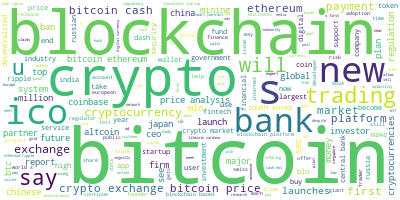

In [82]:
from wordcloud import WordCloud


combine_titles = ','.join(crypto_titles)

wordcloud = WordCloud(background_color="white")
wordcloud.generate(combine_titles)
wordcloud.to_image()

# LDA

In [83]:
tfidf = gensim.models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

2: -8.573175316039787
3: -9.852624840133759
4: -9.702972716142037
5: -10.067234422939551
6: -10.687527567337476
7: -9.829682761821013
8: -11.184917316215445
9: -11.071018836119169


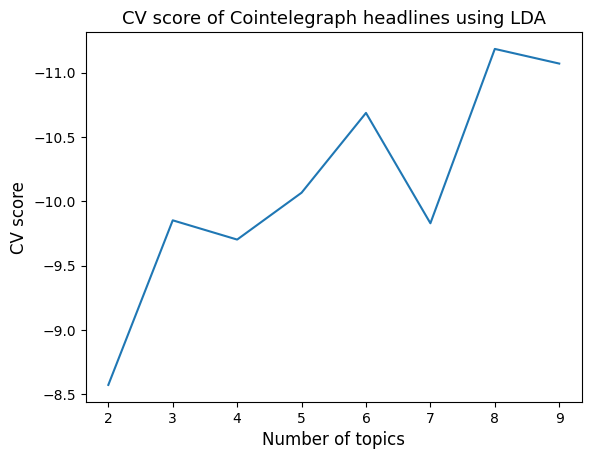

In [84]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.test.utils import common_corpus, common_dictionary

results = []

for i in range(2,10):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=i, iterations=50)

    cm = CoherenceModel(model=lda_model, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()  # get coherence value

    print(f"{i}: {coherence}")
    
    tup = i, coherence
    results.append(tup)

results = pd.DataFrame(results, columns=['topic', 'coherence'])
s = pd.Series(results.coherence.values, index=results.topic.values)
_ = s.plot().invert_yaxis()
plt.xlabel('Number of topics', size=12)
plt.ylabel('CV score', size=12)
plt.title('CV score of Cointelegraph headlines using LDA', size=13)
plt.show()

2: -8.96522957073504
3: -9.497245944096843
4: -9.803931056322652
5: -9.962648005632568
6: -10.066137358973299
7: -10.650904836572769
8: -11.900788998188391
9: -12.178981814299805
10: -11.571853055143597
11: -12.647558867826945
12: -11.972871779084082
13: -12.681116877613922
14: -12.847827534510154


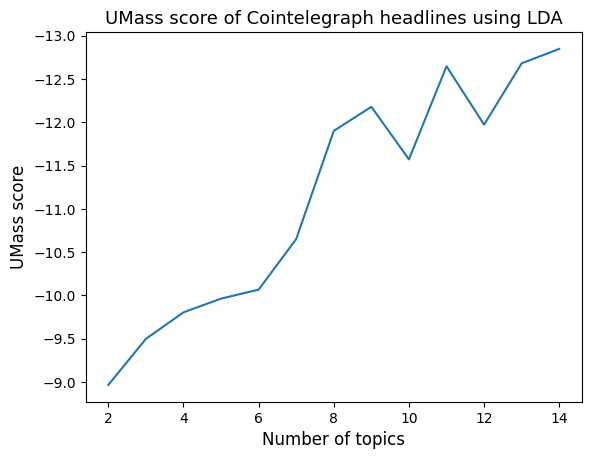

In [85]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.test.utils import common_corpus, common_dictionary

results = []

for i in range(2,15):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=i, iterations=50, alpha=.01)

    cm = CoherenceModel(model=lda_model, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()  # get coherence value

    print(f"{i}: {coherence}")
    
    tup = i, coherence
    results.append(tup)

results = pd.DataFrame(results, columns=['topic', 'coherence'])
s = pd.Series(results.coherence.values, index=results.topic.values)
_ = s.plot().invert_yaxis()
plt.xlabel('Number of topics', size=12)
plt.ylabel('UMass score', size=12)
plt.title('UMass score of Cointelegraph headlines using LDA', size=13)
plt.show()

2: 0.2874076575295452
3: 0.3676815184776576
4: 0.36184632427599706
5: 0.39287515356668734
6: 0.34942097898185326
7: 0.3909828171493049
8: 0.4133254569895577
9: 0.39260653467474854


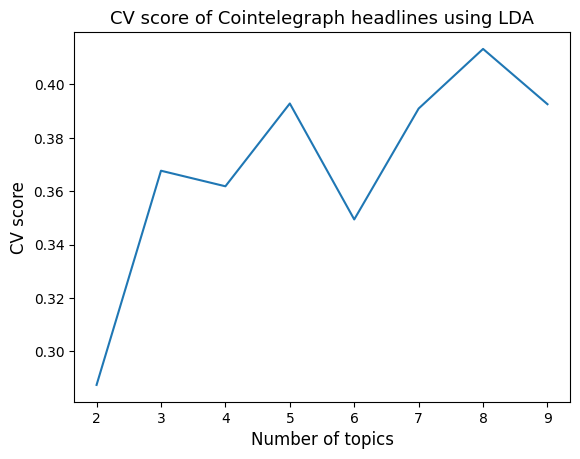

In [86]:
results = []

for i in range(2,10):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=i, iterations=50)

    cm = CoherenceModel(model=lda_model, texts=crypto_titles_words, 
                        dictionary=id2word, coherence='c_v')
    coherence = cm.get_coherence()  # get coherence value

    print(f"{i}: {coherence}")
    tup = i, coherence
    results.append(tup)

results = pd.DataFrame(results, columns=['topic', 'coherence'])
s = pd.Series(results.coherence.values, index=results.topic.values)
_ = s.plot()
plt.xlabel('Number of topics', size=12)
plt.ylabel('CV score', size=12)
plt.title('CV score of Cointelegraph headlines using LDA', size=13)
plt.show()

In [87]:
dict2 = Dictionary(crypto_titles_words)

In [88]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word)

In [89]:
results = []

for t in range(2, 10):
    lda_model2 = gensim.models.LdaModel(corpus, id2word=id2word, num_topics=t, iterations=50)
    corpus_lda = lda_model2[corpus]
    print(t)
    cm = CoherenceModel(model=lda_model2, corpus=corpus, coherence='u_mass')
    score = cm.get_coherence()
    tup = t, score
    results.append(tup)

results = pd.DataFrame(results, columns=['topic', 'score'])

2
3
4
5
6
7
8
9


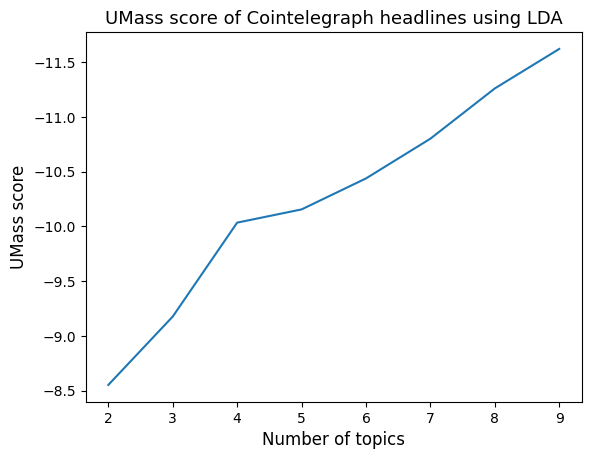

In [90]:
s = pd.Series(results.score.values, index=results.topic.values)
_ = s.plot().invert_yaxis()
plt.xlabel('Number of topics', size=12)
plt.ylabel('UMass score', size=12)
plt.title('UMass score of Cointelegraph headlines using LDA', size=13)
plt.show()

In [91]:
print('hi')

hi


# LSI

2: -6.097206089260164
3: -7.783646778220725
4: -9.416250038582223
5: -10.262832616715428
6: -11.058353613057553
7: -11.26856114500268
8: -13.26134057173222
9: -13.07727674645924
10: -12.315037477192753
11: -11.967607608632191
12: -12.290955465118701
13: -12.010589131345187
14: -13.695647282879577


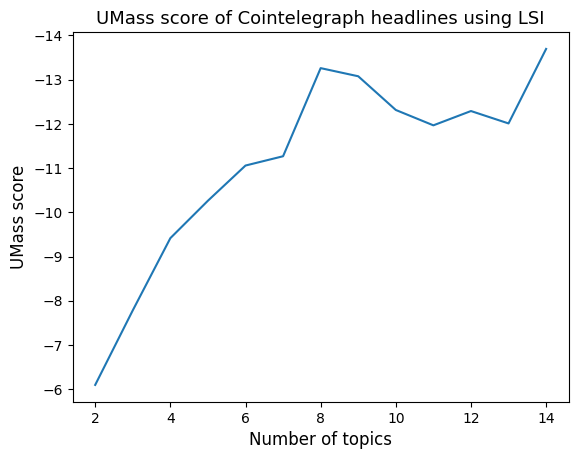

In [92]:
results = []

for i in range(2,15):
    lsi_model = gensim.models.LsiModel(corpus=corpus_tfidf,
                                           id2word=id2word,
                                           num_topics=i)

    cm = CoherenceModel(model=lsi_model, corpus=corpus_tfidf, coherence='u_mass')
    coherence = cm.get_coherence()  # get coherence value

    print(f"{i}: {coherence}")
    
    tup = i, coherence
    results.append(tup)

results = pd.DataFrame(results, columns=['topic', 'coherence'])
s = pd.Series(results.coherence.values, index=results.topic.values)
_ = s.plot().invert_yaxis()

plt.xlabel('Number of topics', size=12)
plt.ylabel('UMass score', size=12)
plt.title('UMass score of Cointelegraph headlines using LSI', size=13)
plt.show()

2: 0.37554074217146977
3: 0.6056751997181963
4: 0.4526502558229743
5: 0.47368239489325825
6: 0.44872779459114503
7: 0.40435126173072156
8: 0.3821863927487507
9: 0.3990974332828614


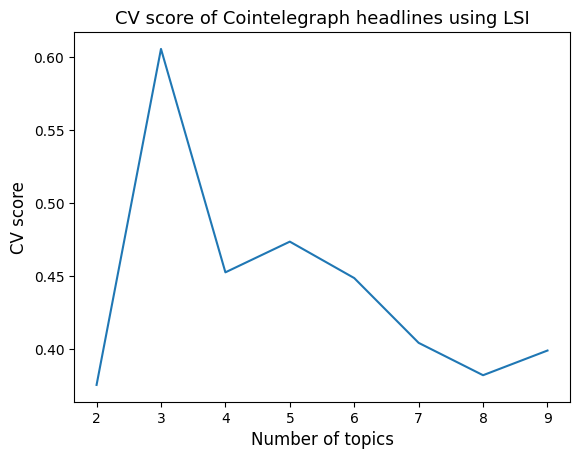

In [114]:
results = [] 

for t in range(2, 10):
    lsi_model = gensim.models.LsiModel(corpus_tfidf, id2word=id2word, num_topics=t)
    corpus_lsi = lsi_model[corpus_tfidf]
    cm = CoherenceModel(model=lsi_model, texts=crypto_titles_words, coherence='c_v')
    score = cm.get_coherence()
    tup = t, score
    results.append(tup)
    
    print(f"{t}: {score}")

results = pd.DataFrame(results, columns=['topic', 'score'])

s = pd.Series(results.score.values, index=results.topic.values)
_ = s.plot()

plt.xlabel('Number of topics', size=12)
plt.ylabel('CV score', size=12)
plt.title('CV score of Cointelegraph headlines using LSI', size=13)
plt.show()

C:\Users\odono\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\odono\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\odono\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\odono\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

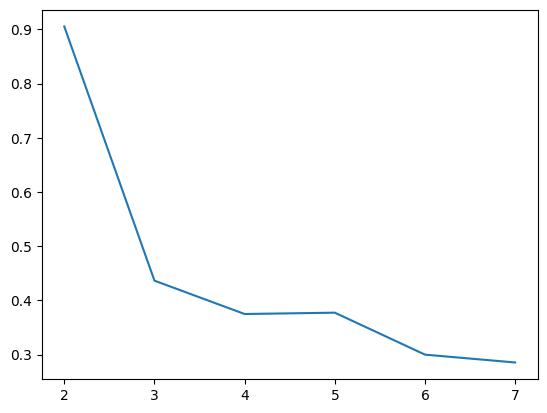

In [94]:
results = []

for t in range(2, 8, 1):
    lsi_model = gensim.models.LsiModel(corpus_tfidf, id2word=id2word, num_topics=t)
    corpus_lsi = lsi_model[corpus_tfidf]

    X = np.array([[tup[1] for tup in arr] for arr in corpus_lsi])
    kmeans = KMeans(n_clusters=t, random_state=37).fit(X)

    score = silhouette_score(X, kmeans.labels_)

    tup = t, score
    results.append(tup)

results = pd.DataFrame(results, columns=['topic', 'score'])

s = pd.Series(results.score.values, index=results.topic.values)
_ = s.plot()

# HDP

In [105]:
hdp = HdpModel(corpus=corpus, id2word=id2word)

In [103]:
pprint(hm.print_topics())

[(0,
  '0.003*lobbies + 0.002*companies + 0.002*maidsafecoin + 0.002*switzerland + '
  '0.002*covered + 0.002*player + 0.002*smartglasses + 0.002*wright + '
  '0.002*mortgage + 0.002*tsukuba'),
 (1,
  '0.003*happens + 0.002*method + 0.002*brothers + 0.002*web + 0.002*use + '
  '0.002*steady + 0.002*open + 0.002*ready + 0.002*agency + 0.002*custody'),
 (2,
  '0.002*forecasts + 0.002*okcoin + 0.002*developer + 0.002*resounding + '
  '0.002*services + 0.002*rumors + 0.002*bite + 0.002*cardano + 0.002*cash + '
  '0.002*deputy'),
 (3,
  '0.002*level + 0.002*supporter + 0.002*blackberry + 0.002*paying + '
  '0.002*open + 0.002*entrepreneur + 0.002*storage + 0.002*secretly + '
  '0.002*wildlife + 0.002*solar'),
 (4,
  '0.003*consolidation + 0.003*strategies + 0.002*hundreds + 0.002*delegation '
  '+ 0.002*censorship + 0.002*steps + 0.002*enter + 0.002*tigereum + '
  '0.002*discuss + 0.002*secret'),
 (5,
  '0.003*addresses + 0.003*guideline + 0.003*days + 0.003*brisbane + '
  '0.002*instrument

In [106]:
hdp_cm=CoherenceModel(model=hdp,corpus=corpus,dictionary=id2word, texts=crypto_titles_words,coherence='c_v')
HDP_cm=hdp_cm.get_coherence()
HDP_cm

0.7927898854457961

In [201]:
co_scores = {'LDA': 0.415, 'LSI': 0.61, 'HDP': 0.793}

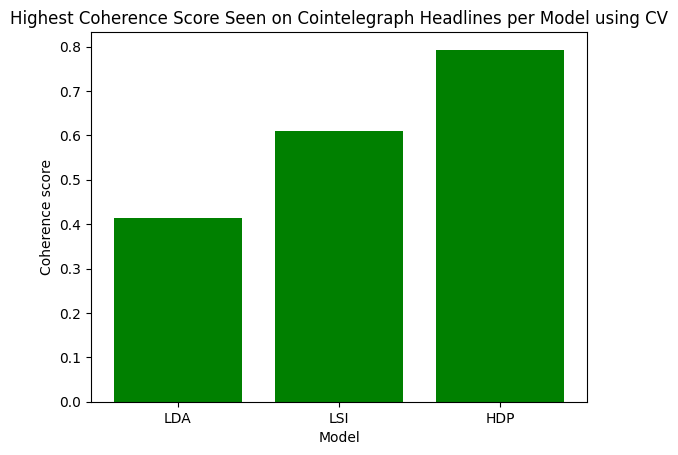

In [204]:
co_values = list(co_scores.values())
names = list(co_scores.keys())
plt.bar(range(len(names)), co_values, tick_label=names, color='green')
plt.title("Highest Coherence Score Seen on Cointelegraph Headlines per Model using CV")
plt.xlabel('Model')
plt.ylabel('Coherence score')
plt.show()